# Trabajo de Bioinformática

## Riesgo poligénico de cáncer de próstata


### Extracción del fichero VCF


In [3]:
! unzip pgp-data.zip
! rm pgp-data.zip
! gunzip -k PGPC_0050_S1.flt.vcf.gz
! wc -l PGPC_0050_S1.flt.vcf

Archive:  pgp-data.zip
  inflating: PGPC_0050_S1.flt.vcf.gz.md5sum  
  inflating: PGPC_0050_S1.flt.vcf.gz.tbi  
  inflating: PGPC_0050_S1.flt.vcf.gz.tbi.md5sum  
  inflating: PGPC_0050_S1.flt.vcf.gz  
4762461 PGPC_0050_S1.flt.vcf


In [5]:
import pandas as pd

fichero = "PGPC_0050_S1.flt.vcf"
vcf_in = pd.read_csv(fichero, skiprows=89, sep="\t")
vcf_in

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,PGPC_0050
0,chrM,73,.,G,A,3070.0,PASS,SNVSB=-161.5;SNVHPOL=3,GT:GQ:GQX:DP:DPF:AD,"1/1:1433:35:477:22:0,477"
1,chrM,150,.,T,C,3070.0,PASS,SNVSB=-427.7;SNVHPOL=2,GT:GQ:GQX:DP:DPF:AD,"1/1:2820:35:950:44:1,949"
2,chrM,195,.,C,T,3070.0,PASS,SNVSB=-617.6;SNVHPOL=2,GT:GQ:GQX:DP:DPF:AD,"1/1:3070:35:1088:85:1,1087"
3,chrM,302,.,AC,A,3070.0,PASS,CIGAR=1M1D;RU=C;REFREP=8;IDREP=7,GT:GQ:GQX:DPI:AD,"0/1:3070:60:1332:219,304"
4,chrM,310,.,CT,C,3070.0,LowGQXHetDel,CIGAR=1M1D;RU=T;REFREP=1;IDREP=0,GT:GQ:GQX:DPI:AD,"0/1:3070:3070:1282:403,155"
...,...,...,...,...,...,...,...,...,...,...
4762366,chrY,59033375,.,T,C,67.0,PLOIDY_CONFLICT,SNVSB=3.5;SNVHPOL=3,GT:GQ:GQX:DP:DPF:AD,"0/1:100:30:25:3:14,11"
4762367,chrY,59033423,.,T,TC,446.0,PLOIDY_CONFLICT,CIGAR=1M1I;RU=C;REFREP=5;IDREP=6,GT:GQ:GQX:DPI:AD,"0/1:486:15:28:14,11"
4762368,chrY,59033432,.,A,C,66.0,PLOIDY_CONFLICT,SNVSB=0.7;SNVHPOL=6,GT:GQ:GQX:DP:DPF:AD,"0/1:99:27:20:8:10,10"
4762369,chrY,59033463,.,G,A,62.0,PLOIDY_CONFLICT,SNVSB=2.1;SNVHPOL=4,GT:GQ:GQX:DP:DPF:AD,"0/1:95:29:23:5:14,9"


### Descarga del genoma de referencia


In [5]:
! wget http://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/hg19.fa.gz
! gunzip hg19.fa.gz

--2024-04-25 11:32:43--  http://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/hg19.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948731419 (905M) [application/x-gzip]
Saving to: ‘hg19.fa.gz’

hg19.fa.gz          100%[===================>] 904.78M  12.3MB/s    in 67s     

2024-04-25 11:33:53 (13.5 MB/s) - ‘hg19.fa.gz’ saved [948731419/948731419]



### Filtrado de los genes

Fuente de la posición: https://www.ncbi.nlm.nih.gov/gene

| Gen          | Posición (cromosoma:inicio..fin) |
| ------------ | -------------------------------- |
| **ATM**      | chr11:108093794..108239829       |
| **BRCA1**    | chr17:41196312..41277381         |
| **BRCA2**    | chr13:32889645..32974405         |
| **CHEK2**    | chr22:29083731..29137822         |
| **EPCAM**    | chr2:47596450..47614159          |
| **HOXB13**   | chr17:46802125..46806112         |
| **MLH1**     | chr3:37035009..37092337          |
| **MSH2**     | chr2:47630206..47710367          |
| **MSH6**     | chr2:48010284..48034092          |
| **NBN**      | chr8:90945559..90996895          |
| **PALB2**    | chr16:23614486..23652631         |
| **PMS2**     | chr7:6010556..6048737            |
| **RAD51D**   | chr17:33419240..33446879         |
| **TP53**     | chr17:7571739..7590808           |
| **RNASEL**\* | chr1:182542769..182558391        |

\*Añadido por el alumno, vinculado a la predisposición al cáncer de próstata.

Fuente: Meyer MS, Penney KL, Stark JR, et al. Genetic variation in RNASEL associated with prostate cancer risk and progression. Carcinogenesis. 2010;31(9):1597-1603. [doi:10.1093/carcin/bgq132](https://doi.org/10.1093/carcin/bgq132)


In [50]:
import pysam

genes = {
    "ATM": "chr11:108093794..108239829",
    "BRCA1": "chr17:41196312..41277381",
    "BRCA2": "chr13:32889645..32974405",
    "CHEK2": "chr22:29083731..29137822",
    "EPCAM": "chr2:47596450..47614159",
    "HOXB13": "chr17:46802125..46806112",
    "MLH1": "chr3:37035009..37092337",
    "MSH2": "chr2:47630206..47710367",
    "MSH6": "chr2:48010284..48034092",
    "NBN": "chr8:90945559..90996895",
    "PALB2": "chr16:23614486..23652631",
    "PMS2": "chr7:6010556..6048737",
    "RAD51D": "chr17:33419240..33446879",
    "TP53": "chr17:7571739..7590808",
    "RNASEL": "chr1:182542769..182558391",
}


def clean_vcf(genes, vcf_file, output_file):
    vcf_in = pysam.VariantFile(vcf_file)
    vcf_out = pysam.VariantFile(output_file, "w", header=vcf_in.header)

    for gene in genes:
        chrom, pos = genes[gene].split(":")
        start, end = pos.split("..")
        for record in vcf_in.fetch(chrom, int(start), int(end)):
            vcf_out.write(record)

    vcf_out.close()


clean_vcf(genes, "PGPC_0050_S1.flt.vcf.gz", "PGPC_0050_S1_CLEAN.vcf")

### Estudio monogénico

Las anotaciones extraídas de ANNOVAR se han analizado en busca de variantes patogénicas. Se han filtrado aquellas con una clasificación de patogénicas, probablemente patogénicas o inciertas según ClinVar. Tan solo se han encontrado 3 variantes inciertas, y ninguna patogénica ni probablemente patogénica.

**Inciertas**:

```
chr17  41196822  41196823  TT   -    RCV000304320.1    rs796628097
 chr2  47641560  47641560   A   -    RCV000415694.1     rs11309117
chr17   7572155   7572155   A   -    RCV000361799.1    rs200757381
```


In [63]:
import pandas as pd

annovar_exome = pd.read_csv("query.output.exome_summary.csv", sep=",")
annovar_genome = pd.read_csv("query.output.genome_summary.csv", sep=",")

annovar_exome = annovar_exome[annovar_exome["ClinVar_SIG"].notnull()]
annovar_genome = annovar_genome[annovar_genome["ClinVar_SIG"].notnull()]
annovar_exome = annovar_exome[annovar_exome["ClinVar_SIG"] != "."]
annovar_genome = annovar_genome[annovar_genome["ClinVar_SIG"] != "."]
annovar_exome = annovar_exome[
    ~annovar_exome["ClinVar_SIG"].str.contains("benign", case=False)
]
annovar_genome = annovar_genome[
    ~annovar_genome["ClinVar_SIG"].str.contains("benign", case=False)
]

print(annovar_exome)
print(annovar_genome)

Empty DataFrame
Columns: [Chr, Start, End, Ref, Alt, Func.refGene, Gene.refGene, GeneDetail.refGene, ExonicFunc.refGene, AAChange.refGene, 1000G_ALL, 1000G_AFR, 1000G_AMR, 1000G_EAS, 1000G_EUR, 1000G_SAS, ExAC_Freq, ExAC_AFR, ExAC_AMR, ExAC_EAS, ExAC_FIN, ExAC_NFE, ExAC_OTH, ExAC_SAS, ESP6500si_ALL, ESP6500si_AA, ESP6500si_EA, CG46, NCI60, dbSNP, COSMIC_ID, COSMIC_DIS, ClinVar_SIG, ClinVar_DIS, ClinVar_ID, ClinVar_DB, ClinVar_DBID, GWAS_DIS, GWAS_OR, GWAS_BETA, GWAS_PUBMED, GWAS_SNP, GWAS_P, SIFT_score, SIFT_converted_rankscore, SIFT_pred, Polyphen2_HDIV_score, Polyphen2_HDIV_rankscore, Polyphen2_HDIV_pred, Polyphen2_HVAR_score, Polyphen2_HVAR_rankscore, Polyphen2_HVAR_pred, LRT_score, LRT_converted_rankscore, LRT_pred, MutationTaster_score, MutationTaster_converted_rankscore, MutationTaster_pred, MutationAssessor_score, MutationAssessor_score_rankscore, MutationAssessor_pred, FATHMM_score, FATHMM_converted_rankscore, FATHMM_pred, PROVEAN_score, PROVEAN_converted_rankscore, PROVEAN_pre

### Extracción de los ficheros PGS

1. https://www.pgscatalog.org/score/PGS000030
2. https://www.pgscatalog.org/score/PGS000662

Fuente:

- [1] Schumacher, F.R., Al Olama, A.A., Berndt, S.I. et al. Association analyses of more than 140,000 men identify 63 new prostate cancer susceptibility loci. Nat Genet 50, 928–936 (2018). https://doi.org/10.1038/s41588-018-0142-8

- [2] Conti, D.V., Darst, B.F., Moss, L.C. et al. Trans-ancestry genome-wide association meta-analysis of prostate cancer identifies new susceptibility loci and informs genetic risk prediction. Nat Genet 53, 65–75 (2021). https://doi.org/10.1038/s41588-020-00748-0


In [ ]:
! wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000030/ScoringFiles/PGS000030.txt.gz
! gunzip PGS000030.txt.gz

! wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000662/ScoringFiles/PGS000662.txt.gz
! gunzip PGS000662.txt.gz

In [5]:
import pandas as pd

PGS_1 = pd.read_csv("PGS000030.txt", comment="#", sep="\t")
PGS_2 = pd.read_csv("PGS000662.txt", comment="#", sep="\t")

### Descarga de los ficheros GWAS

1. https://www.ebi.ac.uk/gwas/studies/GCST006085
2. https://www.ebi.ac.uk/gwas/studies/GCST011049

Fuente:

- [1] Schumacher, F.R., Al Olama, A.A., Berndt, S.I. et al. Association analyses of more than 140,000 men identify 63 new prostate cancer susceptibility loci. Nat Genet 50, 928–936 (2018). https://doi.org/10.1038/s41588-018-0142-8

- [2] Conti, D.V., Darst, B.F., Moss, L.C. et al. Trans-ancestry genome-wide association meta-analysis of prostate cancer identifies new susceptibility loci and informs genetic risk prediction. Nat Genet 53, 65–75 (2021). https://doi.org/10.1038/s41588-020-00748-0


In [6]:
import pandas as pd

GWAS_1 = pd.read_csv(
    "gwas-association-downloaded_2024-04-25-accessionId GCST006085.tsv",
    sep="\t",
)

GWAS_2 = pd.read_csv(
    "gwas-association-downloaded_2024-04-25-accessionId GCST011049.tsv",
    sep="\t",
)

### Extracción de los alelos de las variantes del paciente


In [7]:
import pysam


def get_alleles(vcf_file: str, fasta_file: str, chr: str, pos: int) -> list[str]:
    chr_str = "chr" + chr
    vcf_in = pysam.VariantFile(vcf_file)
    alleles = []

    for variant in vcf_in.fetch(chr_str, pos - 1, pos):
        if variant.pos == pos:
            gt = variant.samples[0]["GT"]
            ref, alt = variant.ref, variant.alts[0]
            if len(gt) > 1 and gt[0] == gt[1]:
                if gt[0] == 0:
                    alleles.append(ref)
                    alleles.append(ref)
                else:
                    alleles.append(alt)
                    alleles.append(alt)
            else:
                alleles.append(ref)
                alleles.append(alt)
        break
    else:
        fasta_in = pysam.FastaFile(fasta_file)
        ref_allele = fasta_in.fetch(chr_str, pos - 1, pos)
        fasta_in.close()
        alleles.append(ref_allele.upper())
        alleles.append(ref_allele.upper())

    vcf_in.close()
    return alleles


vcf_file = "PGPC_0050_S1.flt.vcf.gz"
fasta_file = "hg19.fa"
chr = "11"
pos = 108093833
print(get_alleles(vcf_file, fasta_file, chr, pos))

['G', 'A']


### Obtención de los valores de ES, EAF y nA


In [ ]:
import pandas as pd
from tqdm import tqdm

vcf_file = "PGPC_0050_S1.flt.vcf.gz"
fasta_file = "hg19.fa"

dfs = []

GWAS_1 = GWAS_1.rename(columns={"RISK ALLELE FREQUENCY": "EAF"})
PGS_2 = PGS_2.rename(columns={"allelefrequency_effect_European": "EAF"})

dfs.append(pd.merge(GWAS_1, PGS_1, left_on="SNPS", right_on="rsID", how="inner"))
dfs.append(PGS_2)

results_1 = {"ES": [], "EAF": [], "nA": []}
results_2 = {"ES": [], "EAF": [], "nA": []}
results = [results_1, results_2]

for i, df in enumerate(dfs):
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        chr = row["chr_name"].upper()
        pos = int(row["chr_position"])
        effect_allele = row["effect_allele"].upper()
        effect_weight = float(row["effect_weight"])
        effective_allele_frequency = float(row["EAF"])
        results[i]["ES"].append(effect_weight)
        results[i]["EAF"].append(effective_allele_frequency)

        patient_alleles = get_alleles(vcf_file, fasta_file, chr, pos)
        results[i]["nA"].append(patient_alleles.count(effect_allele))

print(results_1)
print(results_2)

print(len(results_1["ES"]))
print(len(results_1["EAF"]))
print(len(results_1["nA"]))
print(len(results_2["ES"]))
print(len(results_2["EAF"]))
print(len(results_2["nA"]))

### Cálculo de PRS y Z-score


Total score = -0.19 
Sigma = 0.61
Z-score final: -0.31
Genetic risk is lower than 62% of the general population
Genetic risk is higher than 38% of the general population
Total score = 1.02 
Sigma = 0.84
Z-score final: 1.22
Genetic risk is lower than 11% of the general population
Genetic risk is higher than 89% of the general population


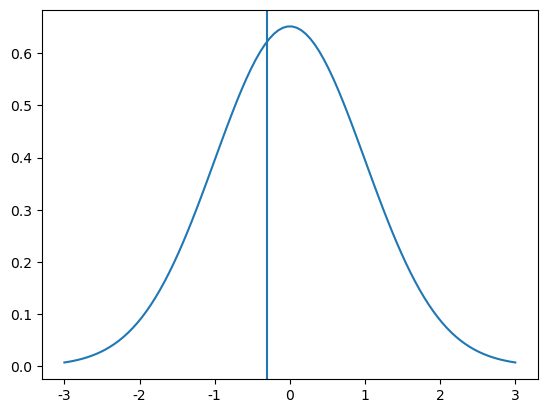

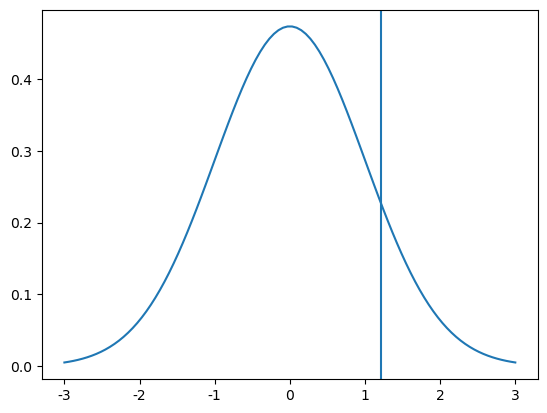

In [ ]:
import math
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt


def calculate_risk(ES, EAF, nA):
    total_score = 0
    sum_sigma2 = 0
    for i in range(len(ES)):
        personal_score = nA[i] * ES[i]
        frac_0 = (1 - EAF[i]) ** 2
        frac_1 = (1 - EAF[i]) * (EAF[i]) * 2
        frac_2 = (EAF[i]) ** 2
        mean = frac_1 * 1 * ES[i] + frac_2 * 2 * ES[i]
        score_diff = personal_score - mean
        total_score += score_diff
        sigma2 = (
            (0 * ES[i] - mean) ** 2 * frac_0
            + (1 * ES[i] - mean) ** 2 * frac_1
            + (2 * ES[i] - mean) ** 2 * frac_2
        )
        sum_sigma2 += sigma2
    print("Total score = %.2f " % total_score)
    sigma_trait = math.sqrt(sum_sigma2)
    print("Sigma = %.2f" % (sigma_trait))
    zscore = total_score / sigma_trait
    print("Z-score final: %.2f" % zscore)
    print(
        "Genetic risk is lower than %.0f%% of the general population"
        % ((1 - st.norm.cdf(zscore)) * 100)
    )
    print(
        "Genetic risk is higher than %.0f%% of the general population"
        % (st.norm.cdf(zscore) * 100)
    )
    x = np.linspace(-3 * sigma_trait, 3 * sigma_trait, 100)
    plt.plot(x, st.norm.pdf(x, 0, sigma_trait))
    ticks = np.linspace(-3 * sigma_trait, 3 * sigma_trait, 7)
    labels = list(range(-3, 4))
    plt.xticks(ticks, labels)
    plt.axvline(zscore * sigma_trait)


calculate_risk(results_1["ES"], results_1["EAF"], results_1["nA"])
plt.figure()
calculate_risk(results_2["ES"], results_2["EAF"], results_2["nA"])

### Verificación de coordenadas

Las coordenadas de las variantes se han verificado con el fichero BAM del paciente. Se ha comprobado que las variantes se encuentran en las posiciones indicadas en los ficheros PGS. Por ejemplo:

- Para el SNP rs2277283, se ha comprobado que la posición 61908440 del cromosoma 11 contiene el alelo C, mientras que el de referencia es T.

![rs2277283](rs2277283.png)

- Para el SNP rs34540271, se ha comprobado que la posición 18554773 del cromosoma 9 contiene el alelo T, mientras que el de referencia es C.

![rs34540271](rs34540271.png)
